In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler

product = pd.read_csv("Dataset/preprocess/Product_clean.csv")
channel = pd.read_csv("Dataset/preprocess/Channel_clean.csv")
sales = pd.read_csv("Dataset/preprocess/Sales_featured.csv")
sales_weekly = pd.read_csv("Dataset/preprocess/Sales_weekly.csv")
print(channel.head())

   site_store region store_type urbanization b2b_b2c
0    60000003   KVMN   Siêu thị    Nội thành     B2B
1    60000006   KVMN   Siêu thị    Nội thành     B2B
2    60000007   KVMN   Siêu thị    Nội thành     B2B
3    60000008   KVMN   Siêu thị    Nội thành     B2B
4    60000534   KVMN   Siêu thị    Nội thành     B2B


In [73]:
#Bảng này để lưu mấy cái đã encode để sau này chạy ML đọc vô hiểu
mapping_master = []

XỬ LÝ BẢNG PRODUCT_CLEAN

In [74]:
# Label encoding cho product_group, brand_name
for col in ['product_group', 'brand_name']:
    le = LabelEncoder()
    product[col + '_enc'] = le.fit_transform(product[col].astype(str))
    df_map = pd.DataFrame({
        'variable_name': col,
        'original_value': le.classes_,
        'encoded_value': range(len(le.classes_))
    })
    mapping_master.append(df_map)

# Ordinal encoding cho price_group
price_order = [['<70', '70<100', '100<200', '200<300', '300<600', '600<900', '>=900']]
ord_enc = OrdinalEncoder(categories=price_order)
product['price_group_enc'] = ord_enc.fit_transform(product[['price_group']])

df_map = pd.DataFrame({
    'variable_name': 'price_group',
    'original_value': price_order[0],
    'encoded_value': range(len(price_order[0]))
})
mapping_master.append(df_map)

In [75]:
print(product.head())

                              product_id product_group brand_name price_group  \
0  80e1107e5bf74598baffea3a7b6073c5DEN38           SAN     Brand1     200<300   
1  c8223e6133a64491a006dc0f95c2bfd9DEN39           SAN     Brand1     200<300   
2  bec30e131ee04e49a4c87bc56f135b13DEN40           SAN     Brand1     200<300   
3  3f4e265b0ac740e9b9edfd23e0ba1ca5DEN41           SAN     Brand1     200<300   
4  53e6284597944ec787e002b631391210DEN42           SAN     Brand1     200<300   

   listing_price  product_group_enc  brand_name_enc  price_group_enc  
0       255273.0                  3               0              3.0  
1       255273.0                  3               0              3.0  
2       255273.0                  3               0              3.0  
3       255273.0                  3               0              3.0  
4       255273.0                  3               0              3.0  


XỬ LÝ BẢNG CHANNEL_CLEAN

In [76]:
channel['store_type'] = channel['store_type'].replace('Độc lâp', 'Độc lập')

# Label encoding cho region và urbanization
for col in ['region', 'urbanization']:
    le = LabelEncoder()
    channel[col + '_enc'] = le.fit_transform(channel[col].astype(str))
    df_map = pd.DataFrame({
        'variable_name': col,
        'original_value': le.classes_,
        'encoded_value': range(len(le.classes_))
    })
    mapping_master.append(df_map)

# Binary encode
channel['is_b2b_b2c'] = (channel['b2b_b2c'] == 'B2C').astype(int)

# One-hot encode cho store_type
store_type_enc = pd.get_dummies(channel['store_type'], prefix='store')
channel = pd.concat([channel, store_type_enc], axis=1)

In [77]:
print(channel.head())

   site_store region store_type urbanization b2b_b2c  region_enc  \
0    60000003   KVMN   Siêu thị    Nội thành     B2B           2   
1    60000006   KVMN   Siêu thị    Nội thành     B2B           2   
2    60000007   KVMN   Siêu thị    Nội thành     B2B           2   
3    60000008   KVMN   Siêu thị    Nội thành     B2B           2   
4    60000534   KVMN   Siêu thị    Nội thành     B2B           2   

   urbanization_enc  is_b2b_b2c  store_Khác  store_Online  store_Pop - up  \
0                 2           0       False         False           False   
1                 2           0       False         False           False   
2                 2           0       False         False           False   
3                 2           0       False         False           False   
4                 2           0       False         False           False   

   store_Siêu thị  store_Store In Store  store_Trong mall  store_Độc lập  
0            True                 False             F

XỬ LÝ BẢNG SALES_FEATURED

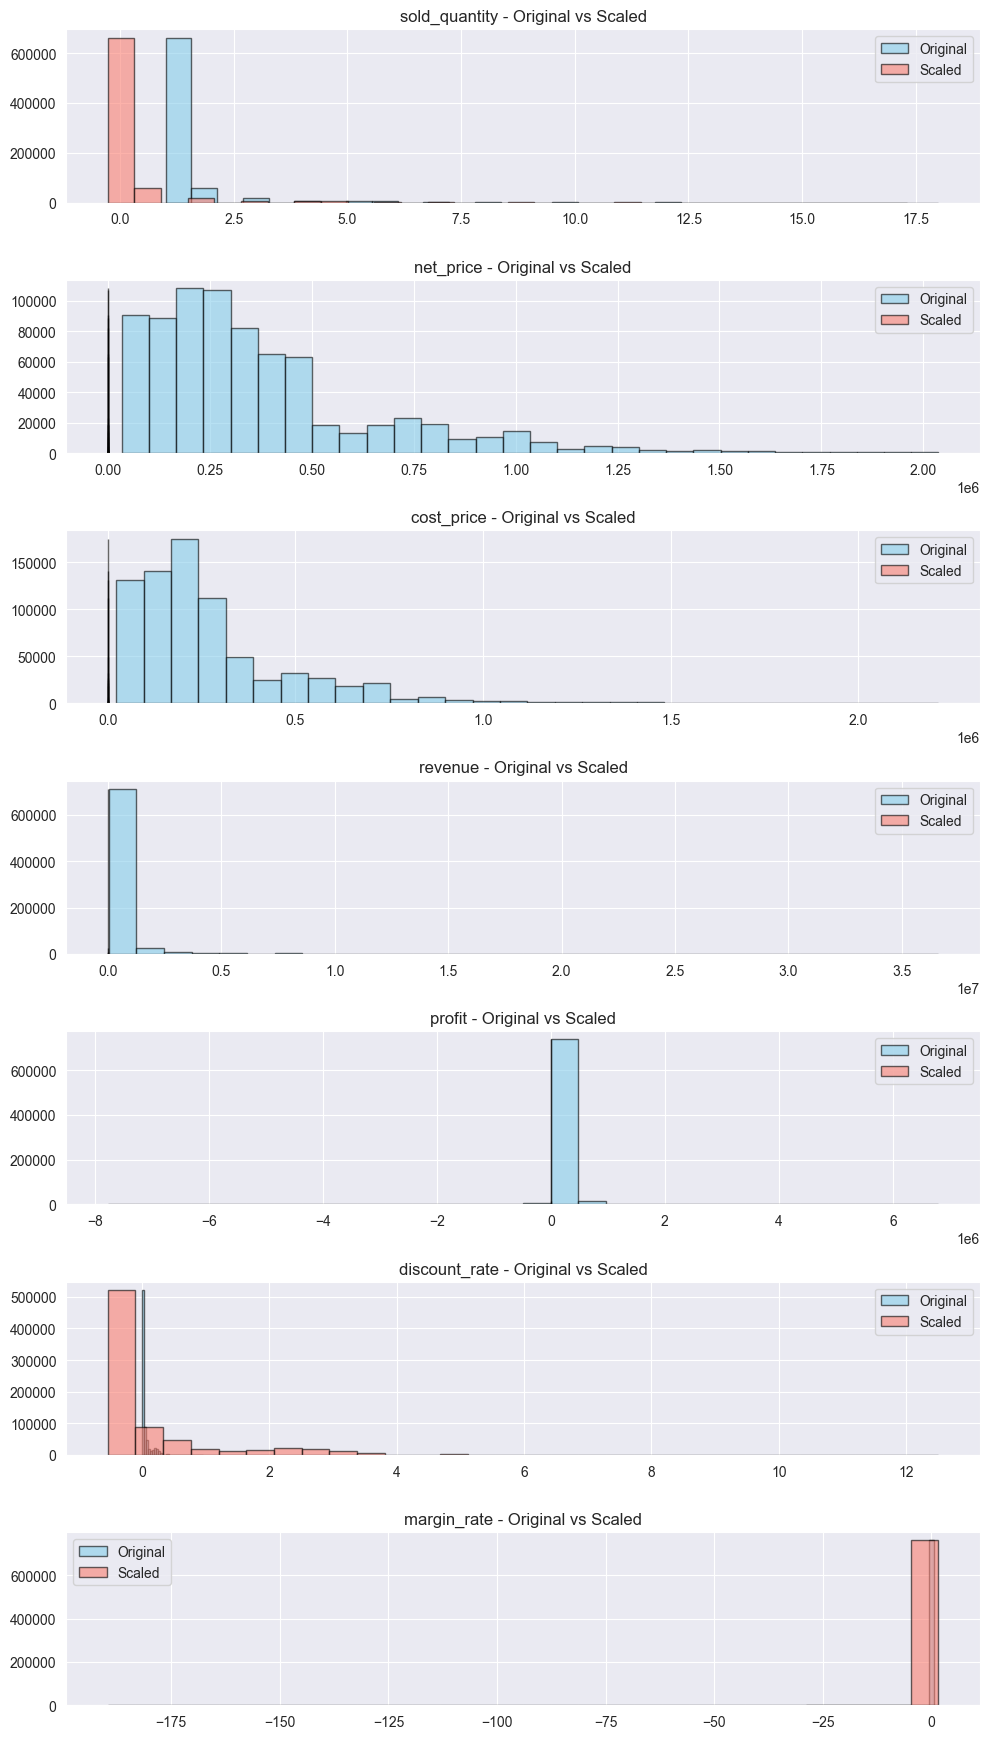

In [78]:
# Label encoding cho distribution_channel_code
le_dist = LabelEncoder()
sales['distribution_channel_code_enc'] = le_dist.fit_transform(sales['distribution_channel_code'].astype(str))
df_map = pd.DataFrame({
    'variable_name': 'distribution_channel_code',
    'original_value': le_dist.classes_,
    'encoded_value': range(len(le_dist.classes_))
})
mapping_master.append(df_map)

# One-hot encode cho season
season_dummies = pd.get_dummies(sales['season'], prefix='season')
sales = pd.concat([sales, season_dummies], axis=1)

#Scale numeric
num_cols = [
    'sold_quantity', 'net_price', 'cost_price',
    'revenue', 'profit','discount_rate', 'margin_rate'
]
#Giữ bản gốc để vẽ so sánh
sales_orig = sales[num_cols].copy()

# Scale dữ liệu
scaler = StandardScaler()
sales_scaled = scaler.fit_transform(sales[num_cols])
sales_scaled_df = pd.DataFrame(sales_scaled, columns=num_cols)

fig, axes = plt.subplots(len(num_cols), 1, figsize=(10, len(num_cols)*2.5))
for i, col in enumerate(num_cols):
    axes[i].hist(sales_orig[col], bins=30, color='skyblue', alpha=0.6, label='Original', edgecolor='black')
    axes[i].hist(sales_scaled_df[col], bins=30, color='salmon', alpha=0.6, label='Scaled', edgecolor='black')
    axes[i].set_title(f'{col} - Original vs Scaled')
    axes[i].legend()

plt.tight_layout()
plt.show()

CHUẨN HÓA - SCALE CÁC BIẾN NUMERIC BẢNG SALESS_WEEKLY

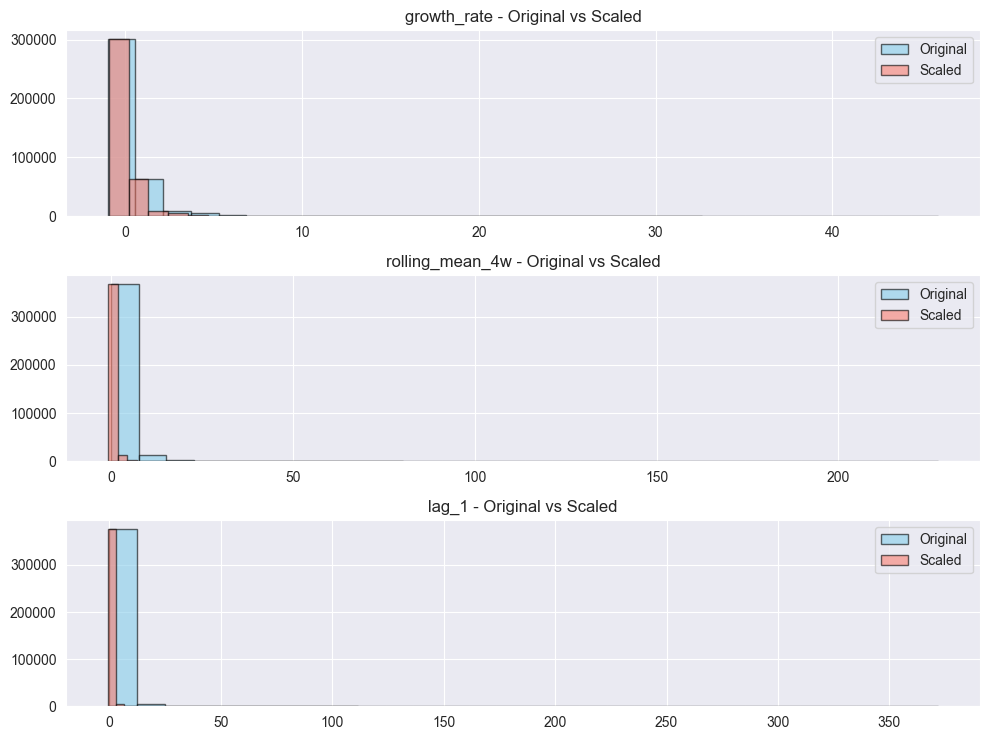

In [79]:
num_cols2 = ['growth_rate', 'rolling_mean_4w', 'lag_1']

#Bản gốc để so sánh
sales_weekly_orig = sales_weekly[num_cols2].copy()

# Scale dữ liệu
scaler2 = StandardScaler()
sales_weekly[num_cols2] = scaler2.fit_transform(sales_weekly[num_cols2])

# Vẽ histogram
fig, axes = plt.subplots(len(num_cols2), 1, figsize=(10, len(num_cols2)*2.5))

for i, col in enumerate(num_cols2):
    axes[i].hist(sales_weekly_orig[col], bins=30, color='skyblue', alpha=0.6, label='Original', edgecolor='black')
    axes[i].hist(sales_weekly[col], bins=30, color='salmon', alpha=0.6, label='Scaled', edgecolor='black')
    axes[i].set_title(f'{col} - Original vs Scaled')
    axes[i].legend()

plt.tight_layout()
plt.show()

In [80]:
mapping_master = pd.concat(mapping_master, ignore_index=True)
mapping_master.to_csv("Dataset/mapping_master.csv", index=False, encoding='utf-8-sig')
channel.to_csv("Dataset/preprocess/Channel_encoded.csv", index=False, encoding='utf-8-sig')
product.to_csv("Dataset/preprocess/Product_encoded.csv", index=False, encoding='utf-8-sig')
sales.to_csv("Dataset/preprocess/Sales_encoded.csv", index=False, encoding='utf-8-sig')
sales_weekly.to_csv("Dataset/preprocess/Sales_weekly_encoded.csv", index=False, encoding='utf-8-sig')